# Statistics and Exploratory Data Analysis Project -SET 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm
from math import factorial
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.DataFrame({'age':[42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]})
df

,age
0,42
1,44
2,62
3,35
4,20
5,30
6,56
7,20
8,23
9,41


# PART-A ( Concept Based)--25 points

## Q1. Compute the mean, median and the mode of the data

In [3]:
# mean
mean=df['age'].mean()
print('The mean od the age is ',mean)

# median
median=df['age'].median()
print('The median od the age is ',median)


# mode
mode=df['age'].mode()
print('The mode od the age is \n',mode)

The mean od the age is  34.46666666666667
The median od the age is  31.5
The mode od the age is 
 0    18
1    20
2    22
3    31
4    36
5    42
Name: age, dtype: int64


## Q2. Compute the range , variance and standard deviation of customer ages|

In [27]:
# Range
ran=df['age'].max()-df['age'].min()
print('The range of the age is ',ran)


# Varince
var=df['age'].var()
print('The variance of the age is ',var)


# standard deviation
sd=df['age'].std()
print('The standard deviation of the age is ',sd)

The range of the age is  48
The variance of the age is  177.36091954022984
The standard deviation of the age is  13.317691974971858


## Q3. Find the mean deviation for the data .


In [28]:
mean=np.mean(df['age'])
print('mean: ',mean)
n=len(df)
print('total customers :',n)

mean:  34.46666666666667
total customers : 30


In [29]:
mean_deviation=sum(np.abs(df['age']-mean)/n)
print('mean deviation: ',mean_deviation)

mean deviation:  10.764444444444441


## Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [30]:
x_bar=np.mean(df['age'])
s=np.std(df['age'],ddof=1)
md=df['age'].median()
skewness=3*(x_bar-md)/s
print(f" The calculated skewness is {skewness}")

 The calculated skewness is 0.668283965173989


## Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem

In [31]:
# According to Chebyshev's Theorem, atleast 75% of the data lies between 2 standard deviations

In [32]:
left_standard_deviation=np.mean(df['age'])-(2*np.std(df['age']))
right_standard_deviation=np.mean(df['age'])+(2*np.std(df['age']))
print('left_standard_deviation ',left_standard_deviation)
print('right_standard_deviation ',right_standard_deviation)

left_standard_deviation  8.278968112659381
right_standard_deviation  60.65436522067395


In [33]:
count=df[(df['age'] <= right_standard_deviation) & (df['age']>=left_standard_deviation)]
print(len(count),'data values that fall within two standard deviations of the mean')

percentage=(len(count)/len(df))*100
print(round(percentage,3), 'percentage of data values that fall within two standard deviations of the mean')

28 data values that fall within two standard deviations of the mean
93.333 percentage of data values that fall within two standard deviations of the mean


## Q6. Find the three quartiles and the interquartile range (IQR).

In [34]:
q1=df['age'].quantile(0.25)
q2=df['age'].quantile(0.50)
q3=df['age'].quantile(0.75)
IQR=q3-q1
print('The first quantile is: ',q1)
print('The second quantile is: ',q2)
print('The third quantile is: ',q3)
print('The Interquartile range is: ',IQR)

The first quantile is:  23.25
The second quantile is:  31.5
The third quantile is:  41.75
The Interquartile range is:  18.5


## Q7. Are there any outliers in the data set ?

In [35]:
ll=q1-1.5*IQR
ul=q3+1.5*IQR

In [36]:
df[(df['age']<ll) | (df['age']>ul)]

,age


## Q8. Draw a boxplot of the dataset to confirm .

<AxesSubplot:xlabel='age'>

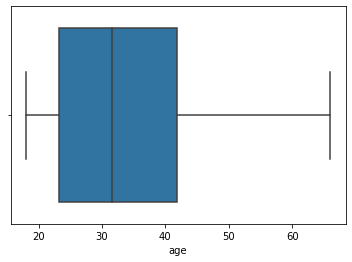

In [37]:
sns.boxplot(data=df,x='age')

## Q9. Find the percentile rank of the datapoint 50.

In [38]:
df['rank']=df['age'].rank(pct=True)*100
df[df['age']==50]

,age,rank
21,50,86.666667


## Q10. What is the probability that a person ordering an EV scooter is above 50 years old?


In [39]:
l=len(df[df['age']> 50])
n=30
prob=l/n
print("The probability that a person becoming a CEO below 50 years of age is ",prob)

The probability that a person becoming a CEO below 50 years of age is  0.13333333333333333


## Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:xlabel='age', ylabel='Count'>

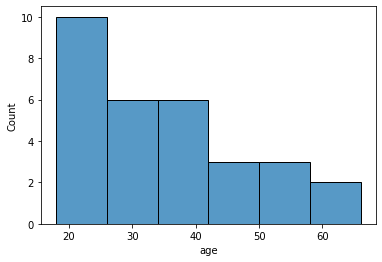

In [40]:
sns.histplot(df['age'])

## Q12. Create a probability distribution of the data and visualize it appropriately.

<AxesSubplot:xlabel='age', ylabel='Density'>

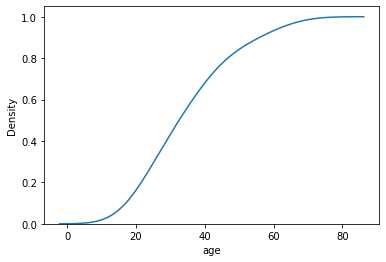

In [41]:
sns.kdeplot(df['age'],cumulative=True)

## Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

In [42]:
# shape of the distribution of the dataset
df.shape

(30, 2)

In [43]:
def sampling_distribution(x,no_of_sample,sample_size):
    sample_mean_list=[]
    for i in range(no_of_sample):
        sample=np.random.choice(x,size=sample_size,replace=True)
        sample_mean=np.mean(sample)
        sample_mean_list.append(sample_mean)
    return sample_mean_list

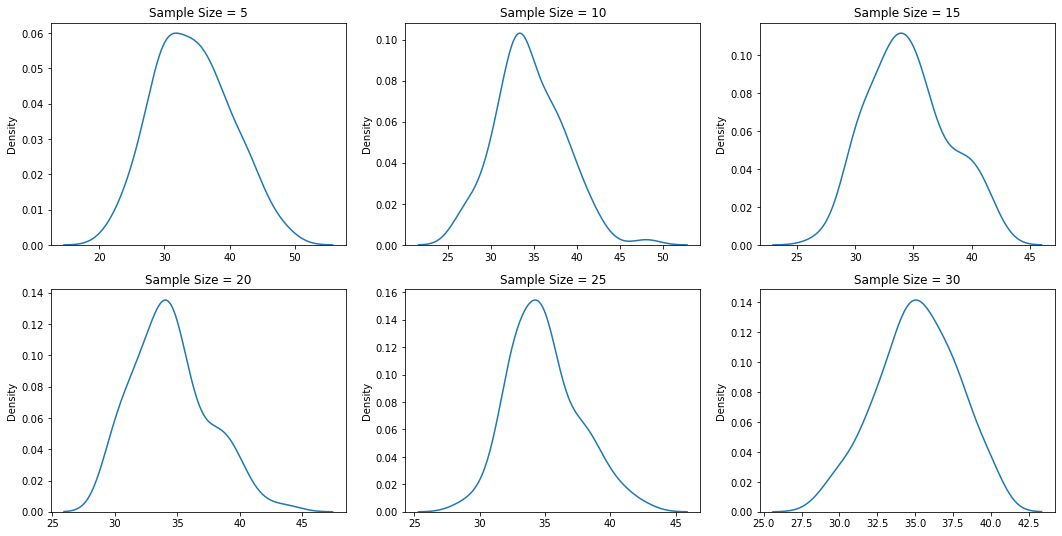

In [44]:
plt.figure(figsize=(18,9))
plt.subplot(2,3,1)
sns.kdeplot(x=sampling_distribution(df['age'],100,5))
plt.title("Sample Size = 5")
plt.subplot(2,3,2)
sns.kdeplot(x=sampling_distribution(df['age'],100,10))
plt.title("Sample Size = 10")
plt.subplot(2,3,3)
sns.kdeplot(x=sampling_distribution(df['age'],100,15))
plt.title("Sample Size = 15")
plt.subplot(2,3,4)
sns.kdeplot(x=sampling_distribution(df['age'],100,20))
plt.title("Sample Size = 20")
plt.subplot(2,3,5)
sns.kdeplot(x=sampling_distribution(df['age'],100,25))
plt.title("Sample Size = 25")
plt.subplot(2,3,6)
sns.kdeplot(x=sampling_distribution(df['age'],100,30))
plt.title("Sample Size = 30")
plt.show()

## Q14. Treat this dataset as a binomial distribution where p is the probability that a person   an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [5]:
x=len(df[df['age']>50])
n=10
p=x/len(df)
prob=stats.binom.pmf(6,n,p)

print('The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is',round(prob,5))

The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is 0.00067


## Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.


[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]



In [6]:
x=25
n=300
print(f"The probability that out of a random sample of 300 buyers exactly 25 are above 50 years of age is {stats.binom.pmf(x,n,p)}")

The probability that out of a random sample of 300 buyers exactly 25 are above 50 years of age is 0.0021064699054422664


## Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution. (State reasons as to why did you use a z or t distribution)

In [7]:
# mean, standard deviation
x=np.mean(df['age'])
sd=np.std(df['age'],ddof=1)
n=30

# alpha
c=0.95
alpha=1-c

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

# confidence interval
me=(z_alpha*sd)/(np.sqrt(n))
ci=x+me,x-me

print('the confidence interval for  population of ev scooter buyers is\n ',ci)

the confidence interval for  population of ev scooter buyers is
  (39.23225396455639, 29.701079368776945)


## Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [6]:
# alpha
ci=0.95
alpha=1-ci

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

sd=np.std(df['age'],ddof=1)
me=0.02
p=0.20
q=1-p
n=30

# sample size


n=(z_alpha*(np.sqrt((p*q)))/me)**2

print('the minimum sample size is  ',round(n))

the minimum sample size is   1537


## Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [107]:
ci=0.90
alpha=1-ci

# z_alpha
z_alpha=stats.norm.isf(alpha/2)

me=0.05
p=0.2
q=1-p

# sample size
n=(z_alpha*(np.sqrt((p*q)))/me)**2

print('the minimum sample size is  ',round(n))

the minimum sample size is   173


## Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV

In [119]:
# alpha
alpha=0.05

# z_alpha
z_alpha=stats.norm.ppf(alpha/2)
print('z_alpha: ',round(z_alpha,3))

# Data
n=30
p=5/30
q=1-p
p_bar=20/100


# # Z statistic score
z=(p-p_bar)/np.sqrt((p_bar*(1-p_bar))/n)
print(f"Z statistic = {round(z,3)}")

z_alpha:  -1.96
Z statistic = -0.456


## Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4.


In [127]:
mu=96
x=91.3
sd=14.4
n=40

### a. Show why you support Zen’s claim using the P-value obtained.

In [128]:
# alpha
alpha=0.05
print('alpha: ',alpha)


# z calculation
z=(x-mu)/(sd/(np.sqrt(n)))

# p_value
p_value=stats.norm.sf(z)
p_value_into2=p_value*2
print('p_value: ',p_value_into2)


alpha:  0.05
p_value:  1.9610073629744729


### b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation]

In [136]:
# H0 : sigma=7.2
# Ha : sigma<>7.2


#alpha
alpha=0.05

# Data
n=40
sigma=7.2
s=14.4

# chi_critical
chi_critical=stats.chi2.isf(alpha,df=n-1)
print('chi_critical: ',chi_critical)

# chisquare
chisquare=((n-1)*(s**2))/(sigma**2)
print('chisquare: ',chisquare)

chi_critical:  54.57222775894174
chisquare:  156.0


### c. Write a summary of results and the action that Zen must take to remedy the complaints.

### d. What is your position on performing the test for variability along with the test for means?

In [ ]:
The test for means helped us in finding out whether the claimed mileage is same as real mileage. 
It only gives one side of picture. 

The test of variances tell us that data is more spread, 
(i.e) there are more number of EVs than expected which do not live up to the claims made by the company.

## Q21. Write a report comparing and contrasting Descriptive vs Inferential Statistics in about 200-500 words and how each helps to get more insight into the data at hand.

*Descriptive statistics* 

1. Descriptive statistics is very important to present our raw data ineffective/meaningful way using numerical calculations or graphs or tables.
2. It helps in organizing, analyzing, and to present data in a meaningful manner.
3. It is used to describe a situation.
4. We can use descriptive statistics to describe both an entire population or an individual sample.
5. It can be achieved with the help of charts, graphs, tables, etc.
6. Descriptive statistics are used to describe the characteristics or features of a dataset.

            *Types of Descriptive Statistics*

1. *Measure of Central Tendency* - The central tendency is the method of making use of the mean and the median to find the data location on the graph.
2. *Measure of Variability* - Variability is most commonly measured with the following descriptive statistics: Range: the difference between the highest and lowest values. Interquartile range: the range of the middle half of a distribution. Standard deviation: average distance from the mean.

*Inferential statistics* 


1. It can be defined as a random sample of data taken from a population to describe and make inferences about the population.
2. It allows us to compare data, and make hypotheses and predictions.
3. It is used to explain the chance of occurrence of an event.
4. Inferential statistics focus on making generalizations about a larger population based on a representative sample of that population.
5. It can be achieved by probability.
6. Allow you to test a hypothesis or assess whether your data is generalizable to the broader population.

          *Some ways in which inferential Statistics can be measured is through*
          
* Hypothesis test that determines if the population that is being measured has a high value as compared to the other data points in the analysis. It can also help to conclude if the population varies which is based on the results that you have earned from various experiments.
* The confidence interval discovers the error margin in the research and finds out if it affects the testing. You will have to estimate the population range and if it falls under the median or means calculation.

                   * difference between them * 
                   
* The descriptive analysis gives information about the raw data that describes the data in a particular manner. The inferential analysis makes the inference about a population which is done using the data that is drawn from a population.
* Descriptive Statistics helps to organize, analyze, and present the data in a meaningful way. Inferential statistics allows comparing data and making predictions and hypotheses with it.
* Descriptive Statistics is used in order to describe a situation whereas inferential Statistics is used to explain the chances of the occurrence of an event
* Descriptive Statistics explains the data that is already known and is limited to a population or a sample of a small size. Inferential Statistics tries to reach out to a conclusion about the population.
* Descriptive Statistics can be done using graphs, charts, and tables. Inferential Statistics is achieved through probability.
* Descriptive Statistics has a tabular or diagrammatic representation of the final result whereas inferential Statistics represents the result in the probability form.
* Descriptive Statistics describes the situation where inferential Statistics explains the likelihood if the event will occur.
* Descriptive Statistics measures only the group that is assigned for the experiment which means that when you do the descriptive analysis you decide to not consider in the variables. In the case of inferential Statistics, you account for the sampling errors which may make you conduct additional tests that need to be on a large population depending on the amount of data that is required. In other words, you are likely to get a definite calculation when you use descriptive statistics.
* Since you are testing the variables using inferential Statistics it is easy to arrive at conclusions when you use descriptive statistics.

# PART-B ( Dataset based)--25 points

### Steps and tasks: [ Total Score: 25 points]

## 1. Read the data set, clean the data and prepare a final dataset to be used for  analysis.[ 5 points]


In [343]:
df=pd.read_csv('Basketball.csv')
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [345]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

##### removing the '-'

In [346]:
df[df['Score']=='-']

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [347]:
df1=df.drop(index=60)

In [348]:
# changing the datatype of the columns
df1['Score']=df1['Score'].astype(int)
df1['PlayedGames']=df1['PlayedGames'].astype(int)
df1['WonGames']=df1['WonGames'].astype(int)
df1['DrawnGames']=df1['DrawnGames'].astype(int)
df1['LostGames']=df1['LostGames'].astype(int)
df1['BasketScored']=df1['BasketScored'].astype(int)
df1['BasketGiven']=df1['BasketGiven'].astype(int)

In [349]:
# TournamentChampion, Runner-up changing the datatype and cleaning the the column
df1[['TournamentChampion', 'Runner-up']]=df1[['TournamentChampion', 'Runner-up']].apply(lambda x : x.replace('-',0).astype(int))

In [350]:
# teamlaunch 
df1['TeamLaunch']=df1['TeamLaunch'].str[:4]

In [351]:
# team column
df1['Team']=list(map(lambda x : x.lstrip('Team'),df1['Team']))
df1['Team']=df1['Team']

In [352]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     int32 
 3   PlayedGames          60 non-null     int32 
 4   WonGames             60 non-null     int32 
 5   DrawnGames           60 non-null     int32 
 6   LostGames            60 non-null     int32 
 7   BasketScored         60 non-null     int32 
 8   BasketGiven          60 non-null     int32 
 9   TournamentChampion   60 non-null     int32 
 10  Runner-up            60 non-null     int32 
 11  TeamLaunch           60 non-null     object
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int32(9), int64(2), object(2)
memory usage: 4.1+ KB


## 2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.[ 15 points]

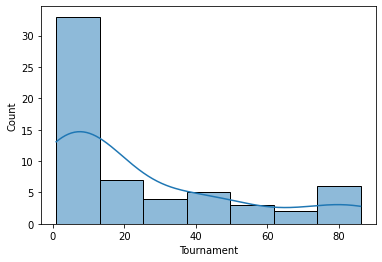

In [353]:
# tournament
sns.histplot(data=df1,x='Tournament',kde=True)
plt.show()

In [354]:
# team that are qualified which have played 50 or above tournamnets
df1_qualified=df1[df1['Tournament']>=50]

In [355]:
# winning percentage
df1_qualified['Game_Winning_pct']=((df1_qualified['WonGames'])/(df1_qualified['PlayedGames']))*100

In [356]:
# basket percentage(whose percentage is high is not the best)
df1_qualified['Basket_ratio']=((df1_qualified['BasketGiven'])/(df1_qualified['BasketScored']))*100
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609
6,7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,36.100533,107.758382
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958
8,9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,35.146022,106.112561
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807


In [359]:
# team that are semi finalist which have HighestPositionHeld 1
df1_qualified=df1_qualified[df1_qualified['HighestPositionHeld']==1]
df1_qualified

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807


In [360]:
# tournament winning pct
df1_qualified['Tournament_winning_pct']=(df1_qualified['TournamentChampion']/df1_qualified['Tournament'])*100

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Game_Winning_pct,Basket_ratio,Tournament_winning_pct
0,1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,52.799731,38.372093
1,2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,52.779661,29.069767
2,3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,72.981914,12.500000
3,4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,78.876762,7.317073
4,5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,79.896351,9.302326
5,6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,91.657609,1.369863
7,8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,100.061958,2.857143
9,10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,115.423807,1.960784


<AxesSubplot:>

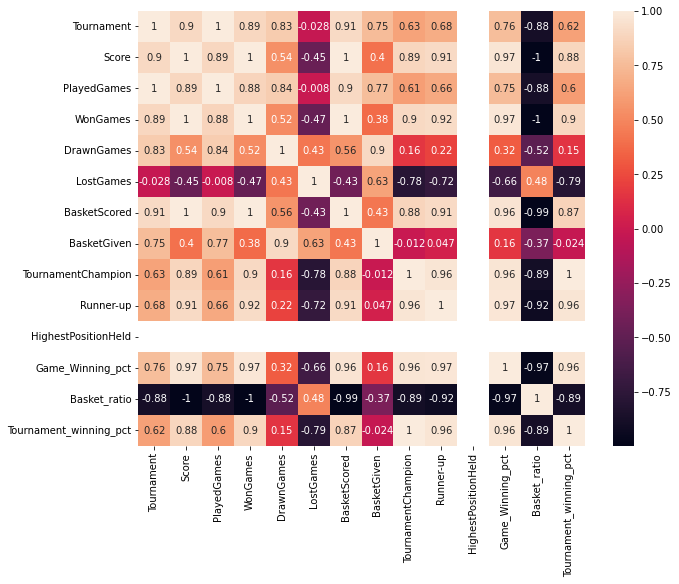

In [361]:
# finding correlation between two variables
plt.figure(figsize=(10,8))
sns.heatmap(df1_qualified.corr(),annot=True)

<AxesSubplot:xlabel='Score', ylabel='Team'>

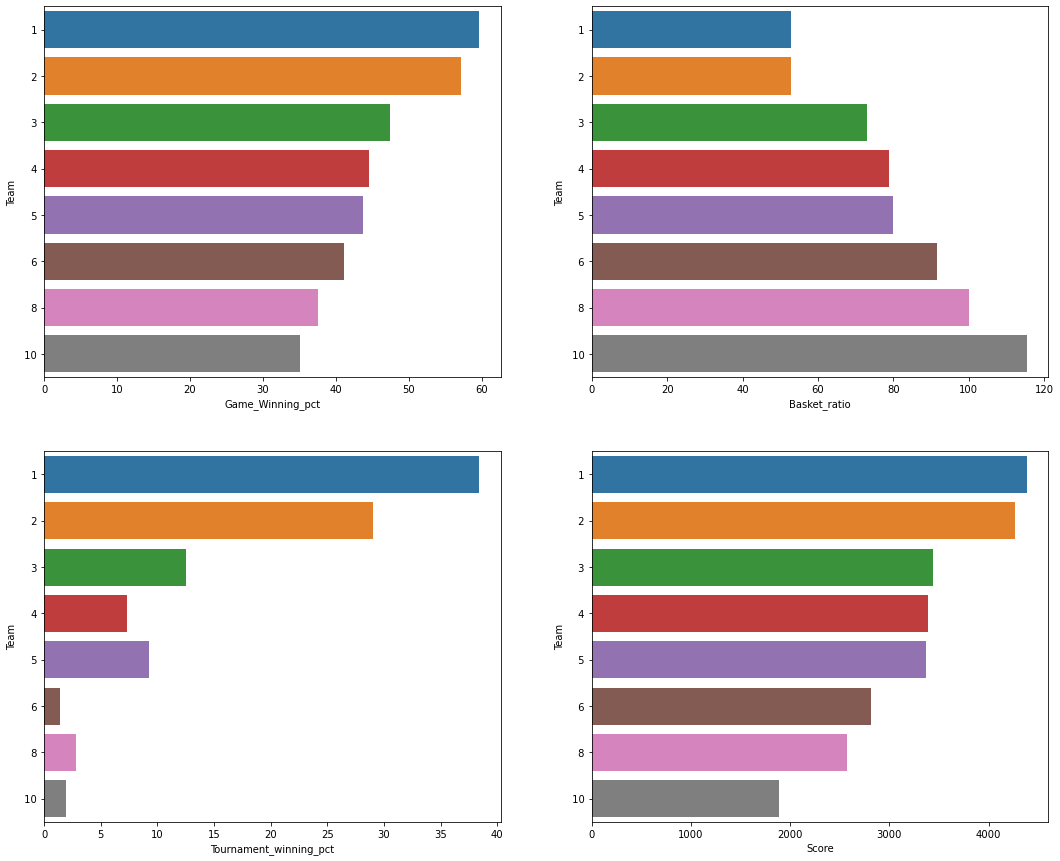

In [363]:
# visualizing the finalist from this
plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
sns.barplot(data=df1_qualified,y='Team',x='Game_Winning_pct')
plt.subplot(2,2,2)
sns.barplot(data=df1_qualified,y='Team',x='Basket_ratio')
plt.subplot(2,2,3)
sns.barplot(data=df1_qualified,y='Team',x='Tournament_winning_pct')
plt.subplot(2,2,4)
sns.barplot(data=df1_qualified,y='Team',x='Score')

## which team has played highest number of 	Tournament?

In [364]:
df1.groupby('Team')['Tournament'].max()[0:1]
# as you can see team 1 has played the highest number of tournaments.

Team
 1    86
Name: Tournament, dtype: int64

## 3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.Submit a 200-500 words report to the management[5-points]